In [7]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
cov_data = np.corrcoef(iris.data.T)
print (iris.feature_names)
cov_data



import matplotlib.pyplot as plt
img = plt.matshow(cov_data, cmap=plt.cm.winter)
plt.colorbar(img, ticks=[-1, 0, 1])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


C:\Users\Gilma\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:57: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


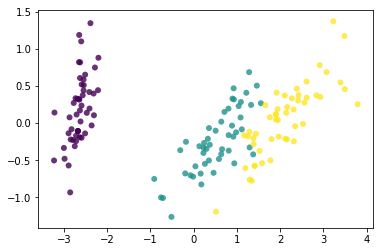

0.97763177502480314

In [9]:
from sklearn.decomposition import RandomizedPCA
rpca_2c = RandomizedPCA(n_components=2)
X_rpca_2c = rpca_2c.fit_transform(iris.data)
plt.scatter(X_rpca_2c[:,0], X_rpca_2c[:,1], c=iris.target, alpha=0.8,
edgecolors='none'); plt.show()
rpca_2c.explained_variance_ratio_.sum()

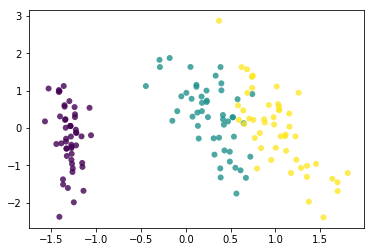

In [10]:
from sklearn.decomposition import FactorAnalysis
fact_2c = FactorAnalysis(n_components=2)
X_factor = fact_2c.fit_transform(iris.data)
plt.scatter(X_factor[:,0], X_factor[:,1], c=iris.target, alpha=0.8,
edgecolors='none'); plt.show()

In [11]:
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.med', 'sci.space']
twenty_sci_news = fetch_20newsgroups(categories=categories)
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vect = TfidfVectorizer()
word_freq = tf_vect.fit_transform(twenty_sci_news.data)
from sklearn.decomposition import TruncatedSVD
tsvd_2c = TruncatedSVD(n_components=50)
tsvd_2c.fit(word_freq)
np.array(tf_vect.get_feature_names())[tsvd_2c.components_[20].argsort
()[-10:][::-1]]

URLError: <urlopen error [WinError 10060] Uma tentativa de conexão falhou porque o componente conectado não respondeu
corretamente após um período de tempo ou a conexão estabelecida falhou
porque o host conectado não respondeu>

In [17]:
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
continuous_variables = [n for n in range(np.shape(boston.data)[1]) if
n!=2]
from sklearn import preprocessing
normalized_data = preprocessing.StandardScaler().fit_transform(boston.data[:,continuous_variables])
outliers_rows, outliers_columns = np.where(np.abs(normalized_data)>3)
print (outliers_rows)

[ 55  56  57 102 141 142 152 154 155 160 162 163 199 200 201 202 203 204
 208 209 210 211 212 216 218 219 220 221 222 225 234 236 256 257 262 269
 273 274 276 277 282 283 283 284 347 351 352 353 353 354 355 356 357 358
 363 364 364 365 367 369 370 372 373 374 374 380 398 404 405 406 410 410
 411 412 412 414 414 415 416 418 418 419 423 424 425 426 427 427 429 431
 436 437 438 445 450 454 455 456 457 466]


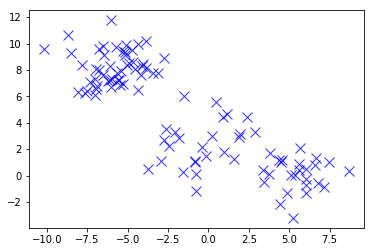

C:\Users\Gilma\Anaconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "lowerright". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  six.iterkeys(self.codes))))


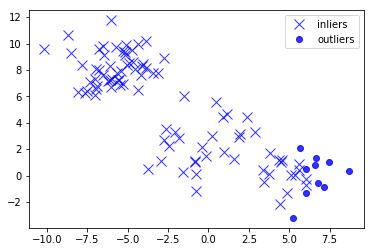

In [22]:
# Create an artificial distribution made of blobs
from sklearn.datasets import make_blobs
blobs = 4
blob = make_blobs(n_samples=100, n_features=2, centers=blobs,
cluster_std=1.5, shuffle=True, random_state=5)
# Robust Covariance Estimate

from sklearn.covariance import EllipticEnvelope
robust_covariance_est = EllipticEnvelope(contamination=.1).fit(blob[0])
detection = robust_covariance_est.predict(blob[0])
outliers = np.where(detection==-1)
inliers = np.where(detection==1)
# Draw the distribution and the detected outliers
import matplotlib.pyplot as plt# Just the distribution
plt.plot(blob[0][:,0],blob[0][:,1], 'x', markersize=10,
color='blue', alpha=0.8)
plt.show()
# The distribution and the outliers
a = plt.plot(blob[0][inliers,0],blob[0][inliers,1], 'x',
markersize=10, color='blue', alpha=0.8, label='inliers')
b = plt.plot(blob[0][outliers,0],blob[0][outliers,1], 'o',
markersize=6,color='blue', alpha=0.8, label='outliers')
plt.legend((a[0],b[0]),('inliers','outliers'),numpoints=1,loc='lowerright')
plt.show()

In [32]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,
iris.target, test_size=0.50, random_state=4)
# Use a very bad multiclass classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
iris.target_names


C:\Users\Gilma\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [37]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 
print ("Recall:", metrics.recall_score(y_test, y_pred))

[[30  0  0]
 [ 0 19  3]
 [ 0  2 21]]
Accuracy: 0.933333333333


ValueError: Target is multiclass but average='binary'. Please choose another average setting.